In [1]:
%matplotlib inline


# Augment Speech and Sound for Machine Learning


Use PySoundTool to augment audio signals. 

To see how PySoundTool implements this, see `pysoundtool.augment`.

Note: PySoundTool is an experimental framework. This is a package mainly for exploring sound in the context of machine learning; testing of functionality is in constant progress.



In [2]:
# to be able to import pysoundtool from parent directory:
import os
package_dir = '../'
os.chdir(package_dir)

Let's import pysoundtool, assuming it is in your working directory:



In [3]:
import pysoundtool as pyst;
import IPython.display as ipd

/home/airos/Projects/github/a-n-rose/Python-Sound-Tool/env/lib/python3.6/site-packages/librosa/util/decorators.py:9: NumbaDeprecationWarning: An import was requested from a module that has moved location.
Import of 'jit' requested from: 'numba.decorators', please update to use 'numba.core.decorators' or pin to Numba version 0.48.0. This alias will not be present in Numba version 0.50.0.
  from numba.decorators import jit as optional_jit
Using TensorFlow backend.
/home/airos/Projects/github/a-n-rose/Python-Sound-Tool/env/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/airos/Projects/github/a-n-rose/Python-Sound-Tool/env/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of typ

## Let's work with speech and sound (car horn)

How one augments audio data (images) **depends on the type of audio.** 

**Speech data tends to only be useful if the phonological rules of a language are respected.** For example, splitting a speech signal into several sections might result in unrealistic representations of speech. (However, maybe it will work for a specific purpose, e.g. gender/age classification, if the order of speech segments don't matter.)

Sound data in general will only be fed to neural networks in a limited way. For example, for computer vision, while a car might appear in pictures up-side-down (car accident) or on its side (car trick), sound is recorded via microphone and digitized which means it can only really be visualized accordingly. We don't record things in an up-side-down manner. **Therefore, one doesn't tend to rotate sound 'images' (the signal and stft graphs below) the same way one might images for object recognition.** 

Finally, these augmenting functions are a selection from those applied in research (the specific papers can be found in the source code). There are other ways of augmenting sound data. 

In [4]:
# Use function 'string2pathlib' to turn string path into pathlib object 
# This allows flexibility across operating systems
speech_path = pyst.string2pathlib('audiodata/python.wav')
honk_path = pyst.string2pathlib('audiodata/car_horn.wav')

# Hear and see speech 

(later we'll examine the non-speech sound)

### Note: you can visualize the sound with `feature_type` set as:

* 'stft' (default for this notebook)
* 'signal' 
* 'fbank' 
* 'mfcc'
* 'powspec'

In [5]:
feature_type = 'stft'
sr = 16000
f, sr = pyst.loadsound(speech_path, sr=sr)
ipd.Audio(f,rate=sr)

/home/airos/Projects/github/a-n-rose/Python-Sound-Tool/env/lib/python3.6/site-packages/librosa/core/spectrum.py:1607: UserWarning: power_to_db was called on complex input so phase information will be discarded. To suppress this warning, call power_to_db(np.abs(D)**2) instead.
  warnings.warn('power_to_db was called on complex input so phase '


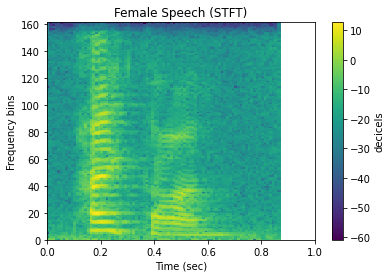

In [6]:
pyst.plotsound(f, sr=sr, feature_type=feature_type, title='Female Speech ({})'.format(feature_type.upper()))

# Augmentation appropriate for speech signals 


## Change Speed



Let's increase the speed by 15% (default setting).


In [7]:
perc = 0.15
fast = pyst.augment.speed_increase(f, sr=sr, perc = perc)

In [8]:
ipd.Audio(fast,rate=sr)

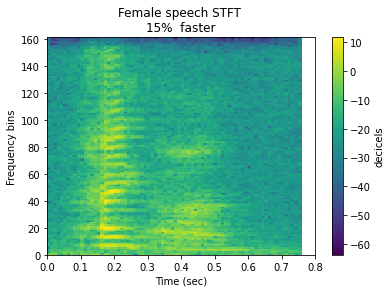

In [9]:
pyst.plotsound(fast, sr=sr, feature_type=feature_type, 
               title='Female speech {} \n{}%  faster'.format(feature_type.upper(), int(perc*100)))

Let's decrease the speed by 15%:



In [10]:
slow = pyst.augment.speed_decrease(f, sr=sr, perc = perc)

In [11]:
ipd.Audio(slow,rate=sr)

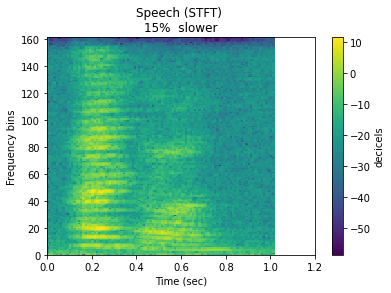

In [12]:
pyst.plotsound(slow, sr=sr, feature_type=feature_type, 
               title='Speech ({}) \n{}%  slower'.format(feature_type.upper(), int(perc*100)))

## Add Noise




Add white noise: 10 SNR



In [13]:
snr = 10
noisy = pyst.augment.add_white_noise(f, sr=sr, snr = snr)

In [14]:
ipd.Audio(noisy,rate=sr)

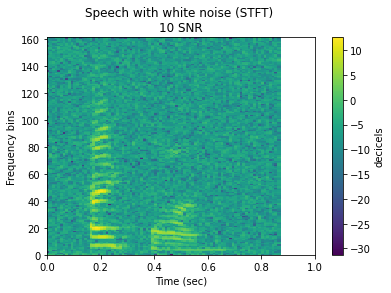

In [15]:
pyst.plotsound(noisy, sr=sr, feature_type=feature_type, 
               title='Speech with white noise ({}) \n{} SNR'.format(feature_type.upper(), snr))

## Harmonic Distortion

Sine function applied to signal 5 times.

In [16]:
hd = pyst.augment.harmonic_distortion(f, sr=sr)

In [17]:
ipd.Audio(hd,rate=sr)

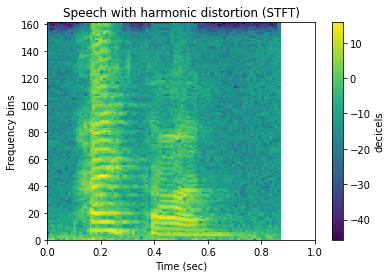

In [18]:
pyst.plotsound(hd, sr=sr, feature_type=feature_type, 
               title='Speech with harmonic distortion ({})'.format(feature_type.upper()))

## Pitch Shift


### Pitch shift increase



In [19]:
num_semitones = 2
psi = pyst.augment.pitch_increase(f, sr=sr, num_semitones = num_semitones)

In [20]:
ipd.Audio(psi,rate=sr)

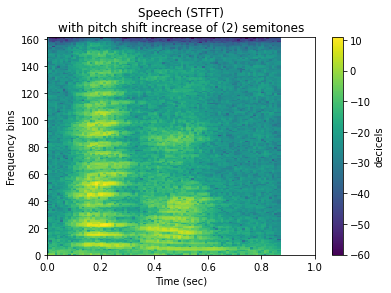

In [21]:
pyst.plotsound(psi, sr=sr, feature_type=feature_type, 
               title='Speech ({})\nwith pitch shift increase of ({}) semitones'.format(feature_type.upper(), num_semitones))

### Pitch shift decrease



In [22]:
psd = pyst.augment.pitch_decrease(f, sr=sr, num_semitones = num_semitones)

In [23]:
ipd.Audio(psd,rate=sr)

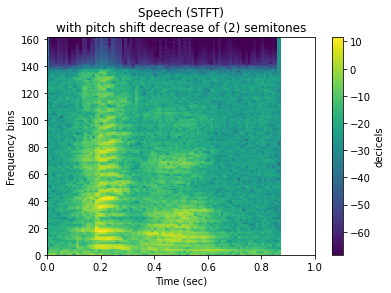

In [24]:
pyst.plotsound(psd, sr=sr, feature_type=feature_type, 
               title='Speech ({})\nwith pitch shift decrease of ({}) semitones'.format(feature_type.upper(), num_semitones))

## Vocal Tract Length Perturbation (VTLP) by factor 0.8 to 1.2

### (Very experimental)

This function returns a STFT matrix (not sample data) as well as warping factor.


### Vocal tract length perturbation: factor 0.8



In [25]:
vtlp_stft, a = pyst.augment.vtlp(f, sr=sr, win_size_ms = 50,
                                 percent_overlap = 0.5,
                                 random_seed = 41)

In order to listen to this, we need to turn the stft into 
samples:



In [26]:
vtlp_y = pyst.feats.feats2audio(vtlp_stft, sr = sr,
                                feature_type = 'stft',
                                win_size_ms = 50,
                                percent_overlap = 0.5)
ipd.Audio(vtlp_y,rate=sr)

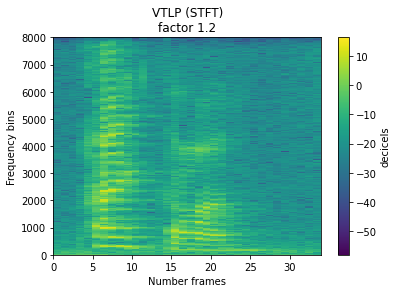

In [55]:
# this function plots the features directly whereas plotsound extracts the features first.
pyst.feats.plot(vtlp_stft, sr=sr, feature_type='stft', 
               title='VTLP (STFT)\nfactor {}'.format(a))

### Vocal tract length perturbation: factor 1.2



In [28]:
vtlp_stft, a = pyst.augment.vtlp(f, sr=sr, win_size_ms = 50,
                                 percent_overlap = 0.5,
                                 random_seed = 43)

In order to listen to this, we need to turn the stft into 
samples:



In [29]:
vtlp_y = pyst.feats.feats2audio(vtlp_stft, sr = sr,
                                feature_type = 'stft',
                                win_size_ms = 50,
                                percent_overlap = 0.5)
ipd.Audio(vtlp_y,rate=sr)

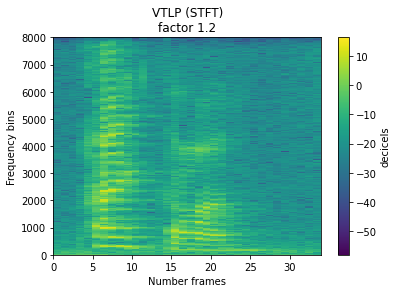

In [30]:
pyst.feats.plot(vtlp_stft, sr=sr, feature_type='stft', 
               title='VTLP (STFT)\nfactor {}'.format(a))

# Augmentation appropriate for non-speech signals 



## Hear and see sound signal 



In [31]:
sr = 16000
h, sr = pyst.loadsound(honk_path, sr=sr)
ipd.Audio(h,rate=sr)

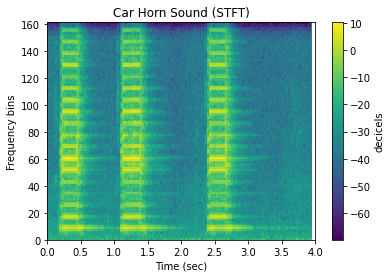

In [32]:
pyst.plotsound(h, sr=sr, feature_type=feature_type, 
               title='Car Horn Sound ({})'.format(feature_type.upper()))

## Time Shift



### We'll apply a random time shift to the sound

You can set a `random_seed`.


In [33]:
h_shift = pyst.augment.time_shift(h, sr=sr)

In [34]:
ipd.Audio(h_shift,rate=sr)

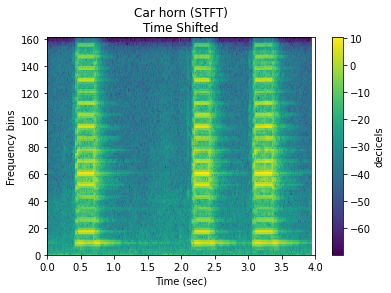

In [35]:
pyst.plotsound(h_shift, sr=sr, feature_type=feature_type, 
               title='Car horn ({})\nTime Shifted'.format(feature_type.upper()))

## Shuffle the Sound

It's hard to tell the difference between the time shift and shuffle with this sound, but the difference is that `shufflesound` divides the sound into `num_subsections` and then shuffles it, while `shift` is divides the sound into just 2 sections and swaps them.


In [36]:
h_shuffle = pyst.augment.shufflesound(h, sr=sr,
                                      num_subsections = 5)

In [37]:
ipd.Audio(h_shuffle,rate=sr)

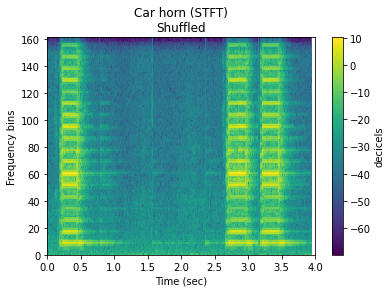

In [38]:
pyst.plotsound(h_shuffle, sr=sr, feature_type=feature_type, 
               title='Car horn ({})\nShuffled'.format(feature_type.upper()))

### Just for comparison.. apply this to speech!

Let's have a listen and look at what happens when applied to speech:

In [39]:
f_shuffle = pyst.augment.shufflesound(f, sr=sr,
                                      num_subsections = 4)

In [40]:
ipd.Audio(f_shuffle,rate=sr)

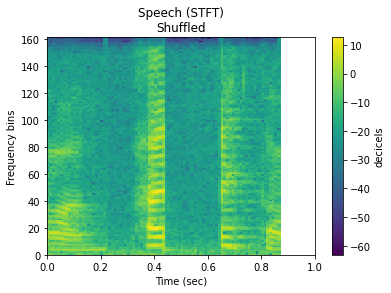

In [41]:
pyst.plotsound(f_shuffle, sr=sr, feature_type=feature_type, 
               title='Speech ({})\nShuffled'.format(feature_type.upper()))

## Add Noise


### Add white noise as SNR 10

Feel free to play around with the SNR value.

In [39]:
snr = 10

In [40]:
h_noisy = pyst.augment.add_white_noise(h, sr=sr, snr = snr)

In [41]:
ipd.Audio(h_noisy,rate=sr)

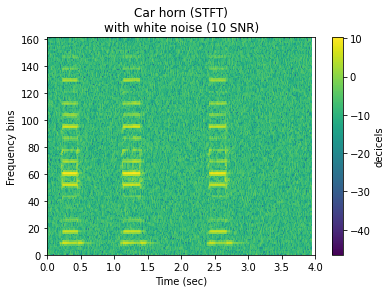

In [42]:
pyst.plotsound(h_noisy, sr=sr, feature_type=feature_type, 
               title='Car horn ({})\nwith white noise ({} SNR)'.format(feature_type.upper(), snr))

### Change Speed



In [44]:
perc = .15
h_fast = pyst.augment.speed_increase(h, sr=sr, perc = perc) # default perc set to 0.15

In [45]:
ipd.Audio(h_fast,rate=sr)

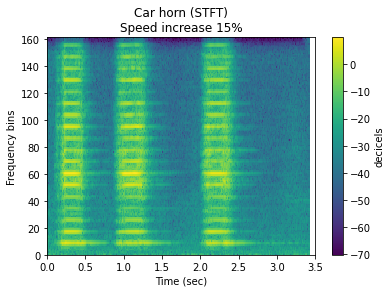

In [47]:
pyst.plotsound(h_fast, sr=sr, feature_type=feature_type, 
               title='Car horn ({})\nSpeed increase {}%'.format(feature_type.upper(), int(perc*100)))

In [48]:
h_slow = pyst.augment.speed_decrease(h, sr=sr, perc=perc) # default perc set to 0.15

In [49]:
ipd.Audio(h_slow,rate=sr)

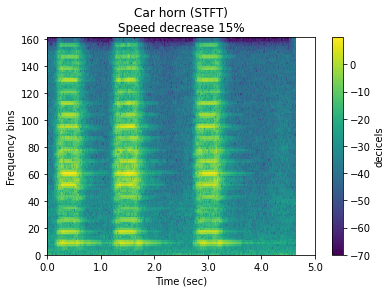

In [50]:
pyst.plotsound(h_slow, sr=sr, feature_type=feature_type, 
               title='Car horn ({})\nSpeed decrease {}%'.format(feature_type.upper(), int(perc*100)))

## Harmonic Distortion

Sine function applied to signal 5 times.

In [52]:
h_hd = pyst.augment.harmonic_distortion(h, sr=sr)

In [53]:
ipd.Audio(h_hd,rate=sr)

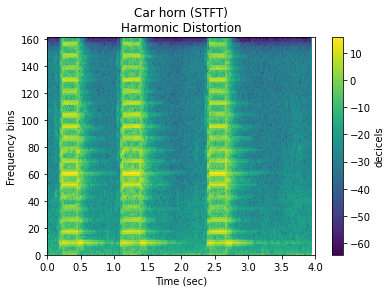

In [54]:
pyst.plotsound(h_hd, sr=sr, feature_type=feature_type, 
               title='Car horn ({})\nHarmonic Distortion'.format(feature_type.upper()))

## Pitch Shift


In [56]:
num_semitones = 2

### pitch shift increase

In [61]:
h_psi = pyst.augment.pitch_increase(h, sr=sr, num_semitones = num_semitones)

In [62]:
ipd.Audio(h_psi,rate=sr)

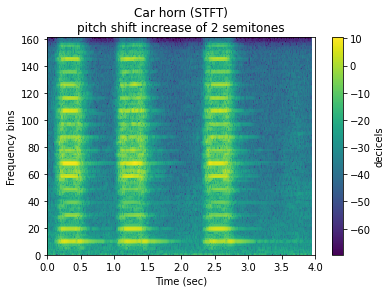

In [63]:
pyst.plotsound(h_psi, sr=sr, feature_type=feature_type, 
               title='Car horn ({})\npitch shift increase of {} semitones'.format(feature_type.upper(), num_semitones))

### pitch shift decrease

In [58]:
h_psd = pyst.augment.pitch_decrease(h, sr=sr, num_semitones = num_semitones)

In [64]:
ipd.Audio(h_psd,rate=sr)

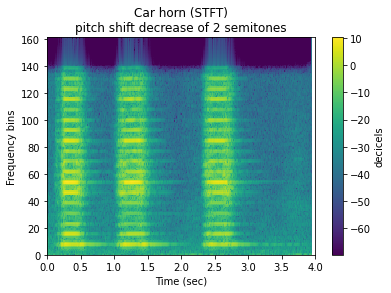

In [65]:
pyst.plotsound(h_psd, sr=sr, feature_type=feature_type, 
               title='Car horn ({})\npitch shift decrease of {} semitones'.format(feature_type.upper(), num_semitones))